{'Kota': 'Painan', 'Suhu (°C)': 25.43, 'Cuaca': 'Overcast clouds', 'Kelembaban (%)': 88, 'Kecepatan Angin (m/s)': 1.72}


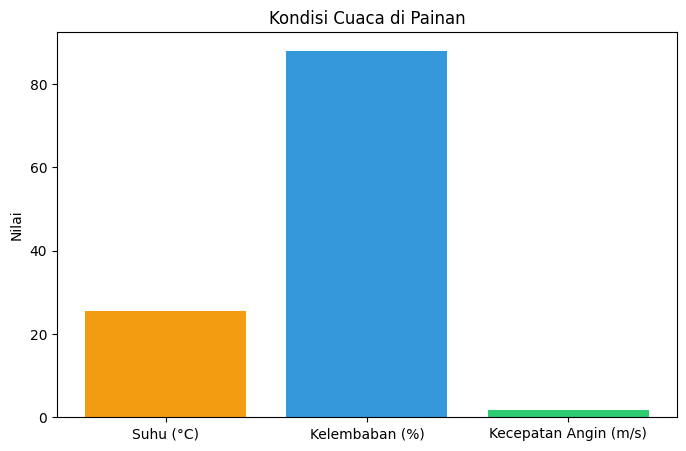

In [1]:
# Import library
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API key (ini HARUS di luar fungsi, jangan di dalam)
api_key = 'f6a79db0fba22353d1625b676200f157'

# Fungsi untuk mengambil data cuaca
def get_weather(city_name, api_key):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'q': city_name,
        'appid': api_key,
        'units': 'metric'  # biar suhu dalam Celcius
    }

    response = requests.get(base_url, params=params)
    data = response.json()
    
    if response.status_code == 200:
        weather_info = {
            'Kota': data['name'],
            'Suhu (°C)': data['main']['temp'],
            'Cuaca': data['weather'][0]['description'].capitalize(),
            'Kelembaban (%)': data['main']['humidity'],
            'Kecepatan Angin (m/s)': data['wind']['speed']
        }
        return weather_info
    else:
        return f"Error: {data['message']}"

# Input nama kota
city = input("Masukkan nama kota: ")

# Ambil data cuaca
weather_data = get_weather(city, api_key)

# Tampilkan hasil
print(weather_data)

# Fungsi tampilkan data dalam tabel DataFrame
def display_weather(data):
    if isinstance(data, dict):
        df = pd.DataFrame(data.items(), columns=['Parameter', 'Nilai'])
        return df
    else:
        return data

# Tampilkan tabel data cuaca
display_weather(weather_data)

# Fungsi untuk membuat grafik
def plot_weather(data):
    if isinstance(data, dict):
        labels = ['Suhu (°C)', 'Kelembaban (%)', 'Kecepatan Angin (m/s)']
        values = [data['Suhu (°C)'], data['Kelembaban (%)'], data['Kecepatan Angin (m/s)']]

        plt.figure(figsize=(8,5))
        plt.bar(labels, values, color=['#f39c12', '#3498db', '#2ecc71'])
        plt.title(f"Kondisi Cuaca di {data['Kota']}")
        plt.ylabel('Nilai')
        plt.show()
    else:
        print(data)

# Tampilkan grafik
plot_weather(weather_data)

# Fungsi ambil cuaca banyak kota sekaligus
def multiple_city_weather(cities, api_key):
    all_data = []
    for city in cities:
        data = get_weather(city, api_key)
        if isinstance(data, dict):
            all_data.append(data)
        else:
            print(data)
    
    df = pd.DataFrame(all_data)
    return df

